In [99]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The model slug is the most recently created folder in ./models/logs

TRAINED_PATH = "./models/trained"

MODEL_SLUG = sorted(os.listdir(TRAINED_PATH))[-1]
print(f"Using model {MODEL_SLUG}")

episodes = pd.read_csv(f"./models/trained/{MODEL_SLUG}/logs/episodes.csv")

plt.rcParams['figure.figsize'] = [15, 8]

plt.close()

Using model ADDQN-400m-testCourse-09-12-2023_16:54


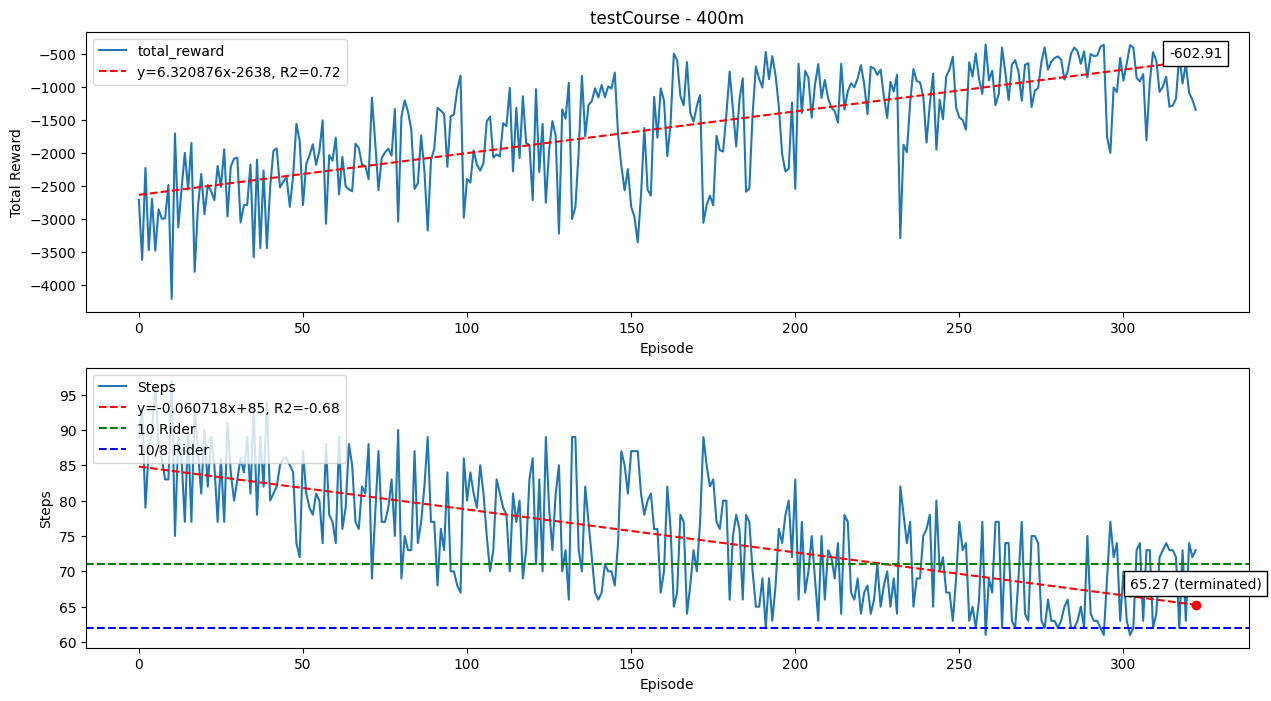

In [100]:

fig, axs = plt.subplots(2, 1)

# ---------------------------------------------

axs[0].plot(episodes['episode'], episodes['total_reward'])
axs[0].set_title("testCourse - 400m")
axs[0].set_ylabel("Total Reward")
axs[0].set_xlabel("Episode")

# Fit a line to the rolling average
x = episodes['episode']
y = episodes['total_reward']
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
axs[0].plot(x, p1(x), "r--")

# Plot current step as a point
current_step = p1(x.iloc[-1])
axs[0].plot(x.iloc[-1], current_step, 'ro')
# Add text to the point
axs[0].text(x.iloc[-1], current_step + 2, f"{current_step:.2f}", ha='center', va='bottom', bbox=dict(facecolor='white', alpha=1))

corr_coef_1 = np.corrcoef(x, y)[0, 1] if np.std(x) > 0 and np.std(y) > 0 else 0
# Add a legend
sign_1 = "+" if p1[0] > 0 else ""

axs[0].legend(['total_reward', f"y={p1[1]:.6f}x{sign_1}{p1[0]:.0f}, R2={corr_coef_1:.2f}"], loc='upper left')

# ---------------------------------------------

axs[1].plot(episodes['episode'], episodes['steps'])
axs[1].set_ylabel("Steps")
axs[1].set_xlabel("Episode")

# Fit a line to the rolling average
x = episodes['episode']
y = episodes['steps']
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)
axs[1].plot(x, p1(x), "r--")

# Add a horizontal line at 71 steps for the "10 Rider"
axs[1].axhline(y=71, color='g', linestyle='--')

# Add a horizontal line at 63 steps for the "10/8 Rider"
axs[1].axhline(y=62, color='b', linestyle='--')

# Plot current step as a point
current_step = p1(x.iloc[-1])
axs[1].plot(x.iloc[-1], current_step, 'ro')

current_exit_reason = episodes['exit_reason'].iloc[-1]

# Add text to the point which includes the exit reason
axs[1].text(x.iloc[-1], current_step + 2, f"{current_step:.2f} ({current_exit_reason})", ha='center', va='bottom', bbox=dict(facecolor='white', alpha=1))

corr_coef_2 = np.corrcoef(x, y)[0, 1] if np.std(x) > 0 and np.std(y) > 0 else 0
# Add a legend

sign_2 = "+" if p1[0] > 0 else ""

axs[1].legend(['Steps', f"y={p1[1]:.6f}x{sign_2}{p1[0]:.0f}, R2={corr_coef_2:.2f}", "10 Rider", "10/8 Rider"], loc='upper left')

